In [2]:
import pandas as pd

number_of_answers = 25974

path = "./data/surveyDataSience.csv"
df = pd.read_csv(path, low_memory=False)

print(f"Numarul respondentilor este {df.shape[0]}:")
print()

df = (pd.read_csv(path, low_memory=False, nrows=number_of_answers)
      .drop(0, axis=0)
      .reset_index(drop=True))

Numarul respondentilor este 25974:



In [3]:
questions_individual = {}
for col in df.columns:
    if "Q" in col:
        question_number = col.split("_")[0]
        if question_number not in questions_individual:
            questions_individual[question_number] = []
        questions_individual[question_number].append(col)

print(f"Numarul de intrebari este {len(questions_individual)}")
print()

Numarul de intrebari este 42



In [6]:
import math

questions = {}
for col in df.columns:
    if "Q" not in col:
        continue
    question_number = col.split("_P")[0]
    if "OTHER" in col:
        questions[question_number.split("_OTHER")[0]].append(col)
        continue
    else:
        if question_number not in questions:
            questions[question_number] = []
    questions[question_number].append(col)

data = {}
for question, values in questions.items():
    if len(values) > 1:
        data[question] = [
            [v for v in row if not (isinstance(v, float) and math.isnan(v))]
            for row in df[values].values.tolist()
        ]
    else:
        data[question] = [v for v in df[values[0]].tolist() if not (isinstance(v, float) and math.isnan(v))]


dict_keys(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27_A', 'Q28', 'Q29_A', 'Q30_A', 'Q31_A', 'Q32_A', 'Q33', 'Q34_A', 'Q35', 'Q36_A', 'Q37_A', 'Q38_A', 'Q39', 'Q40', 'Q41', 'Q42', 'Q27_B', 'Q29_B', 'Q30_B', 'Q31_B', 'Q32_B', 'Q34_B', 'Q36_B', 'Q37_B', 'Q38_B'])


In [5]:
import statistics

time_per_degree = {
    "Bachelor's degree": 3,
    "Master's degree": 5,
    "Doctoral degree": 8
}

average_superior_study_time = statistics.mean(time_per_degree.get(x, 0) for x in data["Q4"])
average_superior_study_time_romania = statistics.mean(time_per_degree.get(x, 0)
                                                      for x, q3 in zip(data["Q4"], data["Q3"]) if q3 == "Romania")
average_superior_study_time_romania_women = statistics.mean(time_per_degree.get(x, 0)
                                                            for x, q3, q2 in zip(data["Q4"], data["Q3"], data["Q2"]) if
                                                            q3 == "Romania" and q2 == "Woman")
print(f"Timp mediu al studiilor superioare : {average_superior_study_time}")
print(f"Timp mediu al studiilor superioare pentru cei din Romania: {average_superior_study_time_romania}")
print(f"Timp mediu al studiilor superioare pentru femei din Romania: {average_superior_study_time_romania_women}")

Timp mediu al studiilor superioare : 3.9556847495476073
Timp mediu al studiilor superioare pentru cei din Romania: 4.163934426229508
Timp mediu al studiilor superioare pentru femei din Romania: 4.75


In [6]:
# count_women_with_complete_responses = sum(
#     all(data[key][index] for key in data.keys()) for index in range(number_of_answers - 1) if data["Q2"][index] == "Woman")
#
# print(f"Numar de femei cu raspunsuri complete: {count_women_with_complete_responses}")
print(sorted(len(data[key]) for key in data.keys()))

[2237, 3127, 4656, 15183, 15391, 15952, 16126, 16251, 16325, 18489, 23754, 24403, 24461, 24829, 25973, 25973, 25973, 25973, 25973, 25973, 25973, 25973, 25973, 25973, 25973, 25973, 25973, 25973, 25973, 25973, 25973, 25973, 25973, 25973, 25973, 25973, 25973, 25973, 25973, 25973, 25973, 25973, 25973, 25973, 25973, 25973, 25973, 25973, 25973, 25973, 25973]


In [7]:
from collections import Counter

count_women_python = sum(
    1 for index in range(number_of_answers - 1) if 'Python' in data["Q7"][index] and data["Q2"][index] == "Woman")
count_women_cpp = sum(
    1 for index in range(number_of_answers - 1) if 'C++' in data["Q7"][index] and data["Q2"][index] == "Woman")

ages_for_women_python = Counter([
    data["Q1"][index] for index in range(number_of_answers - 1)
    if "Python" in data["Q7"][index] and data["Q2"][index] == "Woman"
])
ages_for_women_cpp = Counter([
    data["Q1"][index] for index in range(number_of_answers - 1)
    if "C++" in data["Q7"][index] and data["Q2"][index] == "Woman"

])
print(f"Numar de femei care programeaza in Python : {count_women_python}")
print(f"Cea mai frecventa varsta a femeilor care programeaza in Python : {ages_for_women_python.most_common(1)[0]}")
print(f"Numar de femei care programeaza in Python : {count_women_cpp}")
print(f"Cea mai frecventa varsta a femeilor care programeaza in C++ : {ages_for_women_cpp.most_common(1)[0]}")
print(len(data["Q7"]))


Numar de femei care programeaza in Python : 3877
Cea mai frecventa varsta a femeilor care programeaza in Python : ('18-21', 959)
Numar de femei care programeaza in Python : 972
Cea mai frecventa varsta a femeilor care programeaza in C++ : ('18-21', 447)
25973


In [8]:
quesion_type = {
    "text": [
        "Q2", "Q3", "Q4", "Q5", "Q7", "Q8", "Q9", "Q10", "Q11", "Q12", "Q14", "Q16", "Q17", "Q18", "Q19", "Q20",
        "Q23", "Q24", "Q27_A", "Q27_B", "Q28", "Q29_A", "Q29_B", "Q30_A", "Q30_B", "Q31_A", "Q31_B", "Q32_A", "Q32_B",
        "Q33", "Q34_A", "Q34_B", "Q35", "Q36_A", "Q36_B", "Q37_A", "Q37_B", "Q38_A", "Q38_B", "Q39", "Q40", "Q41", "Q42"
    ],
    "numeric": [
        "Q1", "Q6", "Q13", "Q15", "Q21", "Q22", "Q25", "Q26"
    ]
}


In [9]:
import numpy as np

for q in data.keys():
    # if q in quesion_type["text"]:
    #     continue
    answ = data[q]
    try:
        answ = np.concatenate(answ)
    except ValueError:
        pass
    unique_answers = np.unique(answ)
    if q in quesion_type["text"]:
        print(f"{q}: Valori posibile: {unique_answers}")
    else:
        print(
            f"{q}: Valoare minima: {min(unique_answers)}, Valoare maxima: {max(unique_answers)}, Valori posibile: {unique_answers}")
    print()


Q1: Valoare minima: 18-21, Valoare maxima: 70+, Valori posibile: ['18-21' '22-24' '25-29' '30-34' '35-39' '40-44' '45-49' '50-54' '55-59'
 '60-69' '70+']

Q2: Valori posibile: ['Man' 'Nonbinary' 'Prefer not to say' 'Prefer to self-describe' 'Woman']

Q3: Valori posibile: ['Algeria' 'Argentina' 'Australia' 'Austria' 'Bangladesh' 'Belarus'
 'Belgium' 'Brazil' 'Canada' 'Chile' 'China' 'Colombia' 'Czech Republic'
 'Denmark' 'Ecuador' 'Egypt' 'Ethiopia' 'France' 'Germany' 'Ghana'
 'Greece' 'Hong Kong (S.A.R.)' 'I do not wish to disclose my location'
 'India' 'Indonesia' 'Iran, Islamic Republic of...' 'Iraq' 'Ireland'
 'Israel' 'Italy' 'Japan' 'Kazakhstan' 'Kenya' 'Malaysia' 'Mexico'
 'Morocco' 'Nepal' 'Netherlands' 'Nigeria' 'Norway' 'Other' 'Pakistan'
 'Peru' 'Philippines' 'Poland' 'Portugal' 'Romania' 'Russia'
 'Saudi Arabia' 'Singapore' 'South Africa' 'South Korea' 'Spain'
 'Sri Lanka' 'Sweden' 'Switzerland' 'Taiwan' 'Thailand' 'Tunisia' 'Turkey'
 'Uganda' 'Ukraine' 'United Arab Emirates

TImp minim lucra:0
Timp maxim lucrat:20
Timp mediu lucrat:4.86333885188465
Deviatie standard:5.777152229374191
Valoare mediana:2


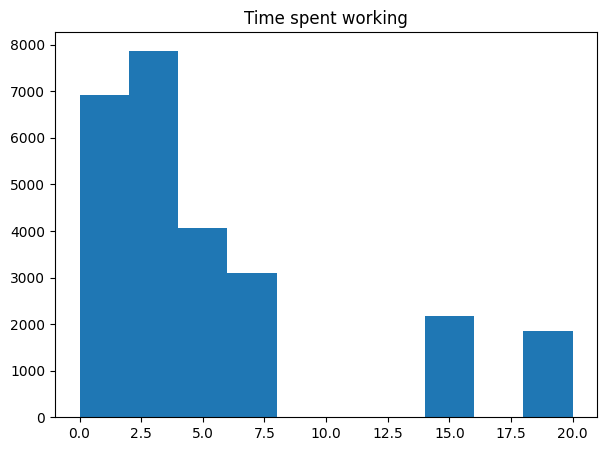

In [14]:
def parse_time_working(value):
    value = value.split(" years")[0]
    if "-" in value:
        a, b = map(float, value.split("-"))
        return int((a + b) / 2)
    if "<" in value:
        return int(value.split("< ")[1])/2
    if "+" in value:
        return int(value.split("+")[0])
    return 0

time_spent_working = [parse_time_working(x) for x in data["Q6"]]
print(f"TImp minim lucra:{min(time_spent_working)}")
print(f"Timp maxim lucrat:{max(time_spent_working)}")
print(f"Timp mediu lucrat:{statistics.mean(time_spent_working)}")
print(f"Deviatie standard:{statistics.stdev(time_spent_working)}")
print(f"Valoare mediana:{statistics.median(time_spent_working)}")

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 5))
ax.hist(time_spent_working, bins=10)
ax.set_title('Time spent working')
plt.show()
# outliers sunt cei cu 15, 20 de ani vechime

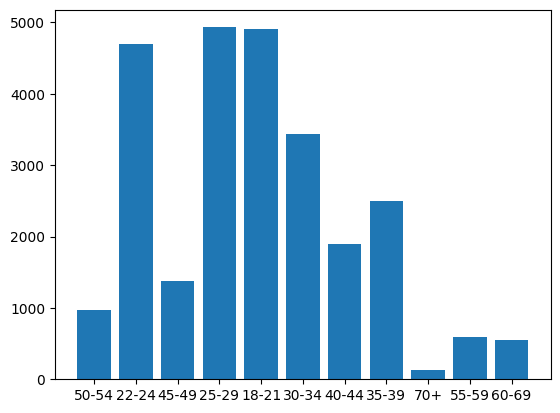

In [10]:
import matplotlib.pyplot as plt
python_programmers_age = Counter([data["Q1"][index] for index in range(number_of_answers - 1)])
plt.bar(python_programmers_age.keys(), python_programmers_age.values())
plt.show()



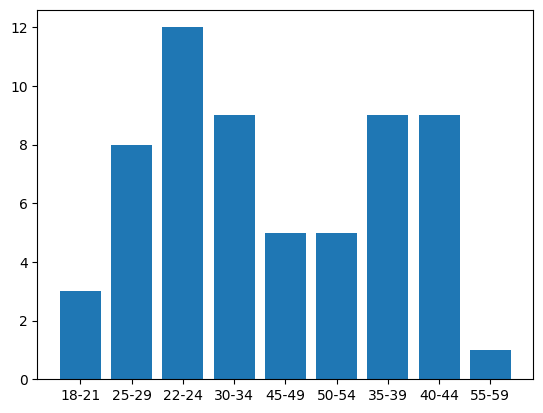

In [11]:
import matplotlib.pyplot as plt
python_programmers_age_ro = Counter([data["Q1"][index] for index in range(number_of_answers - 1) if data["Q3"][index] == "Romania"])
plt.bar(python_programmers_age_ro.keys(), python_programmers_age_ro.values())
plt.show()

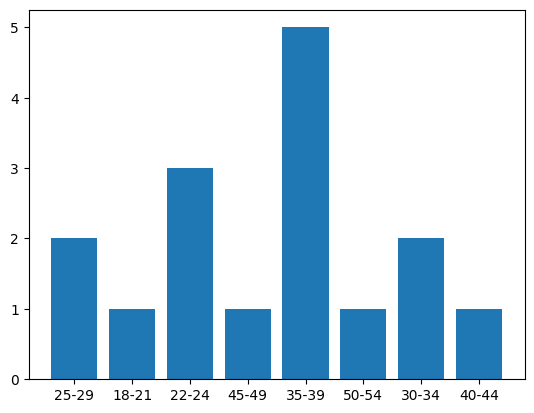

In [12]:
import matplotlib.pyplot as plt
python_programmers_age_ro_women = Counter([data["Q1"][index] for index in range(number_of_answers - 1) if data["Q3"][index] == "Romania" and data["Q2"][index] == "Woman"])
plt.bar(python_programmers_age_ro_women.keys(), python_programmers_age_ro_women.values())
plt.show()

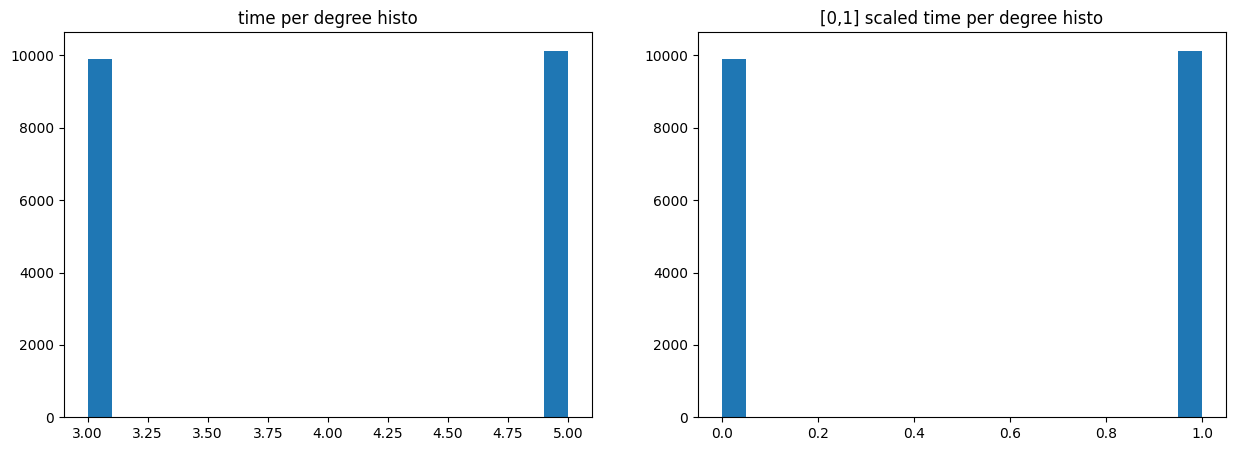

In [26]:
# normalizare timp studiu
time_spent_studying_with_outliers = [time_per_degree.get(x, 0) for x in data["Q4"]]
time_spent_studying = [x for x in time_spent_studying_with_outliers if x not in {0, 8}]
min_time_studying = min(time_spent_studying)
max_time_studying = max(time_spent_studying)

normalized_time_spent_studying = [(t - min_time_studying) / (max_time_studying - min_time_studying) for t in time_spent_studying]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.hist(time_spent_studying, 20)
ax1.set_title('time per degree histo')
ax2.hist(normalized_time_spent_studying, 20)
ax2.set_title('[0,1] scaled time per degree histo')
plt.show()

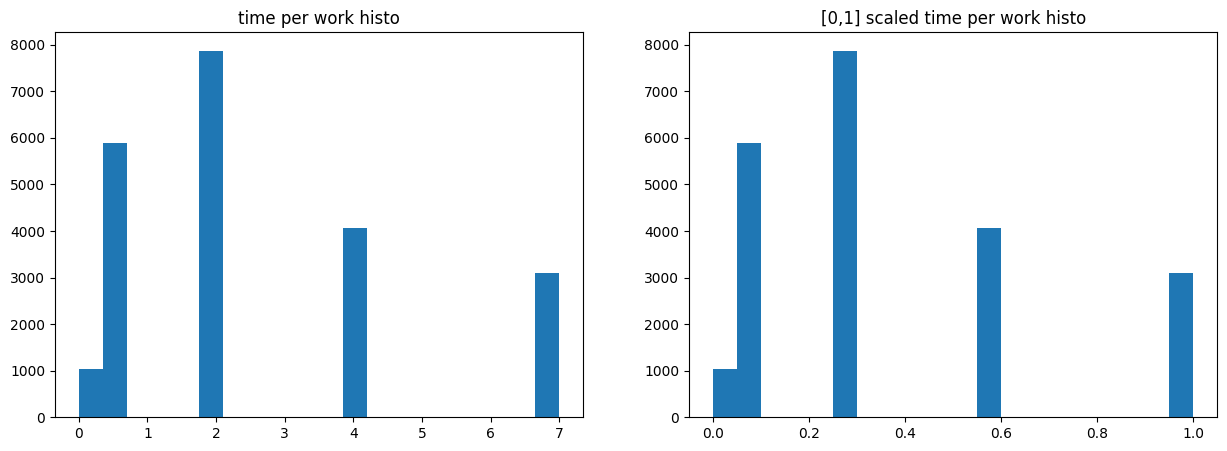

In [32]:
#normalizare timp lucru
time_spent_working_with_outliers = [parse_time_working(x) for x in data["Q6"]]
time_spent_working = [x for x in time_spent_working_with_outliers if x not in {15, 20}]
min_time_working = min(time_spent_working)
max_time_working = max(time_spent_working)

normalized_time_spent_working = [(t - min_time_working) / (max_time_working - min_time_working) for t in time_spent_working]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.hist(time_spent_working, 20)
ax1.set_title('time per work histo')
ax2.hist(normalized_time_spent_working, 20)
ax2.set_title('[0,1] scaled time per work histo')
plt.show()